In [57]:
# Lab 3.6.1
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [58]:
# Lab 3.5.2
Boston = load_data("Boston")

X = pd.DataFrame({
    "intercept": np.ones(Boston.shape[0]),
    "lstat": Boston["lstat"]
    })

X[:4]

y = Boston["medv"]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [59]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [60]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [ ]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
#newX = new_df 
#newX["intercept"]=1.0
#newX = newX[["intercept","lstat"]]
newX


,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [65]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [67]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [68]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [70]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] +b]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\adamt\AppData\Local\Temp\ipykernel_20804\4055536473.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\adamt\AppData\Local\Temp\ipykernel_20804\4055536473.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


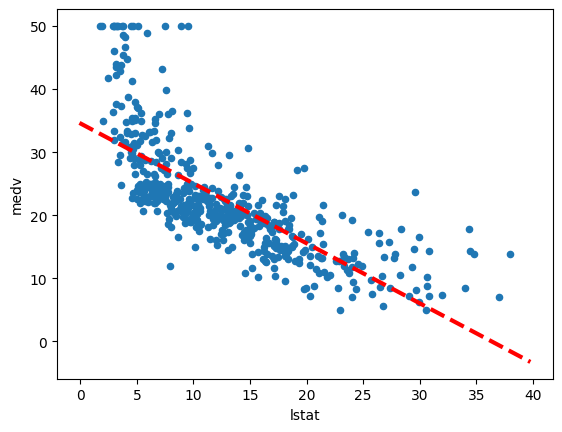

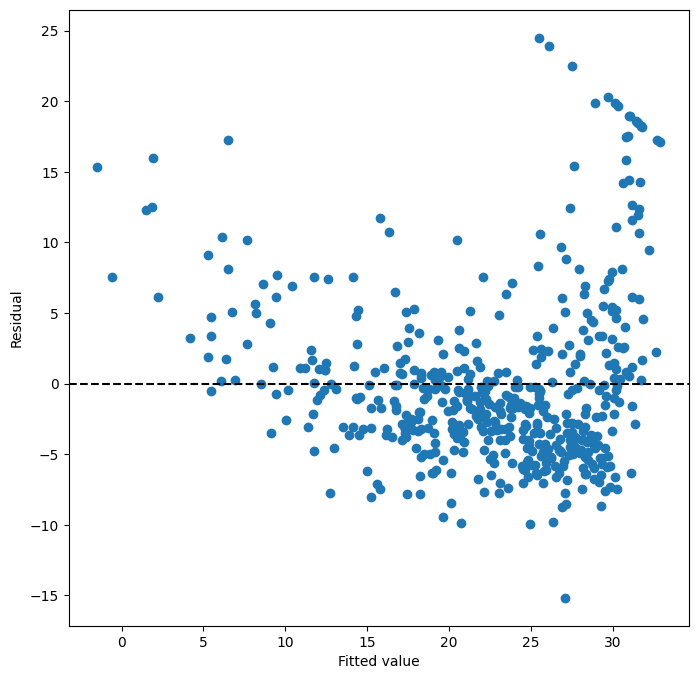

In [72]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

374

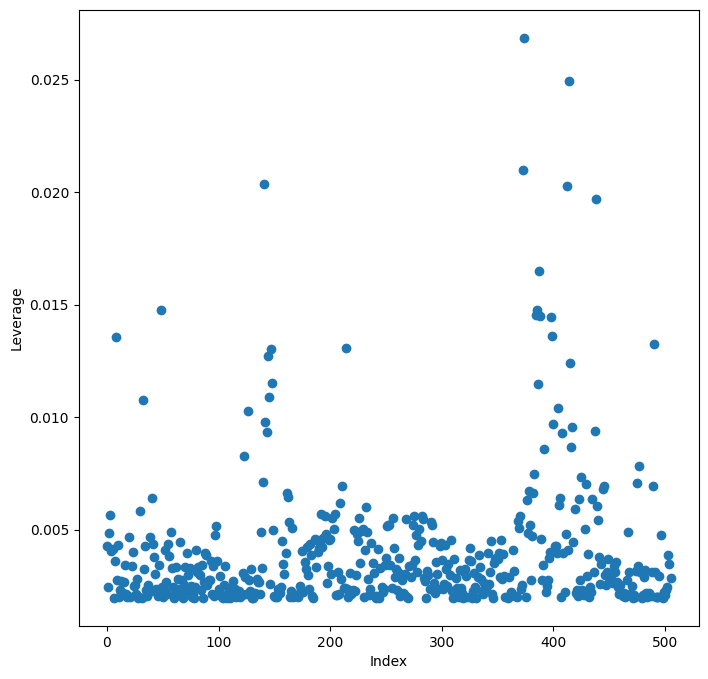

In [73]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [91]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

ValueError: endog and exog matrices are different sizes

In [222]:
# Applied 8
Auto = pd.read_csv("../Resources/Auto.csv", na_values=["?"])
Auto.dropna(inplace=True )


x_value = ["mpg", "displacement","horsepower","weight","acceleration"][1]
#xy=Auto[[x_value,"mpg"]]
#xy.dropna(inplace=True)

X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]), x_value: Auto[x_value]})
y = Auto["mpg"].astype(float)
#y[:4]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)




,coef,std err,t,P>|t|
intercept,35.1206,0.494,71.033,0.0
displacement,-0.0601,0.002,-26.808,0.0


In [207]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] +b]
    ax.plot(xlim, ylim, *args, **kwargs)

C:\Users\adamt\AppData\Local\Temp\ipykernel_20804\3671669652.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[0],
C:\Users\adamt\AppData\Local\Temp\ipykernel_20804\3671669652.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1],


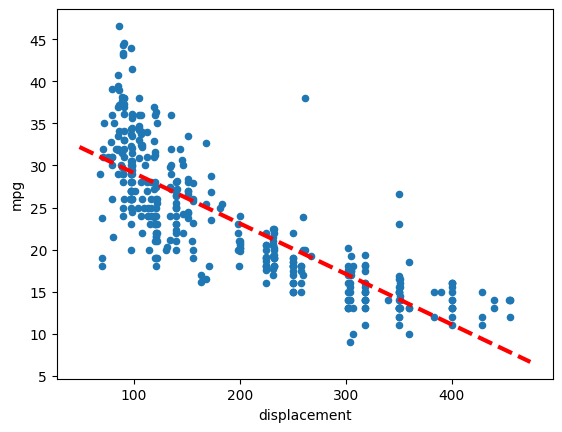

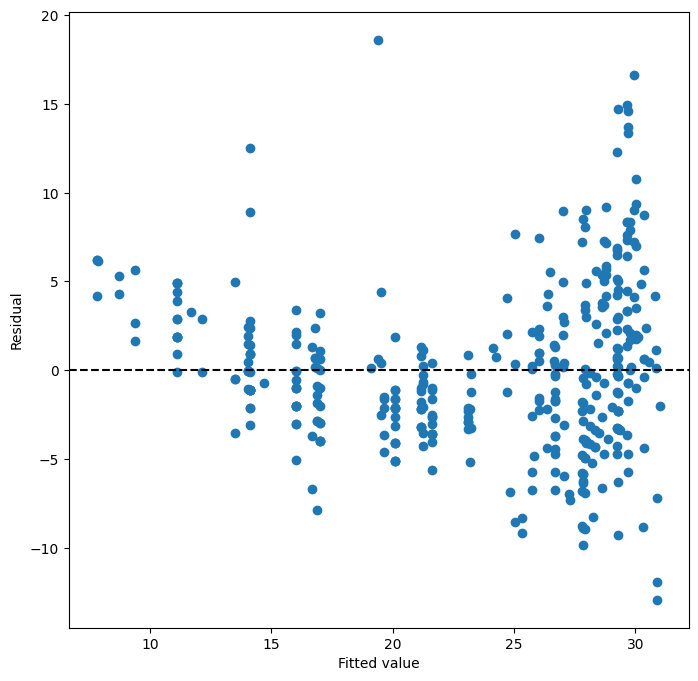

In [223]:
ax = Auto.plot.scatter(x_value, 'mpg')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

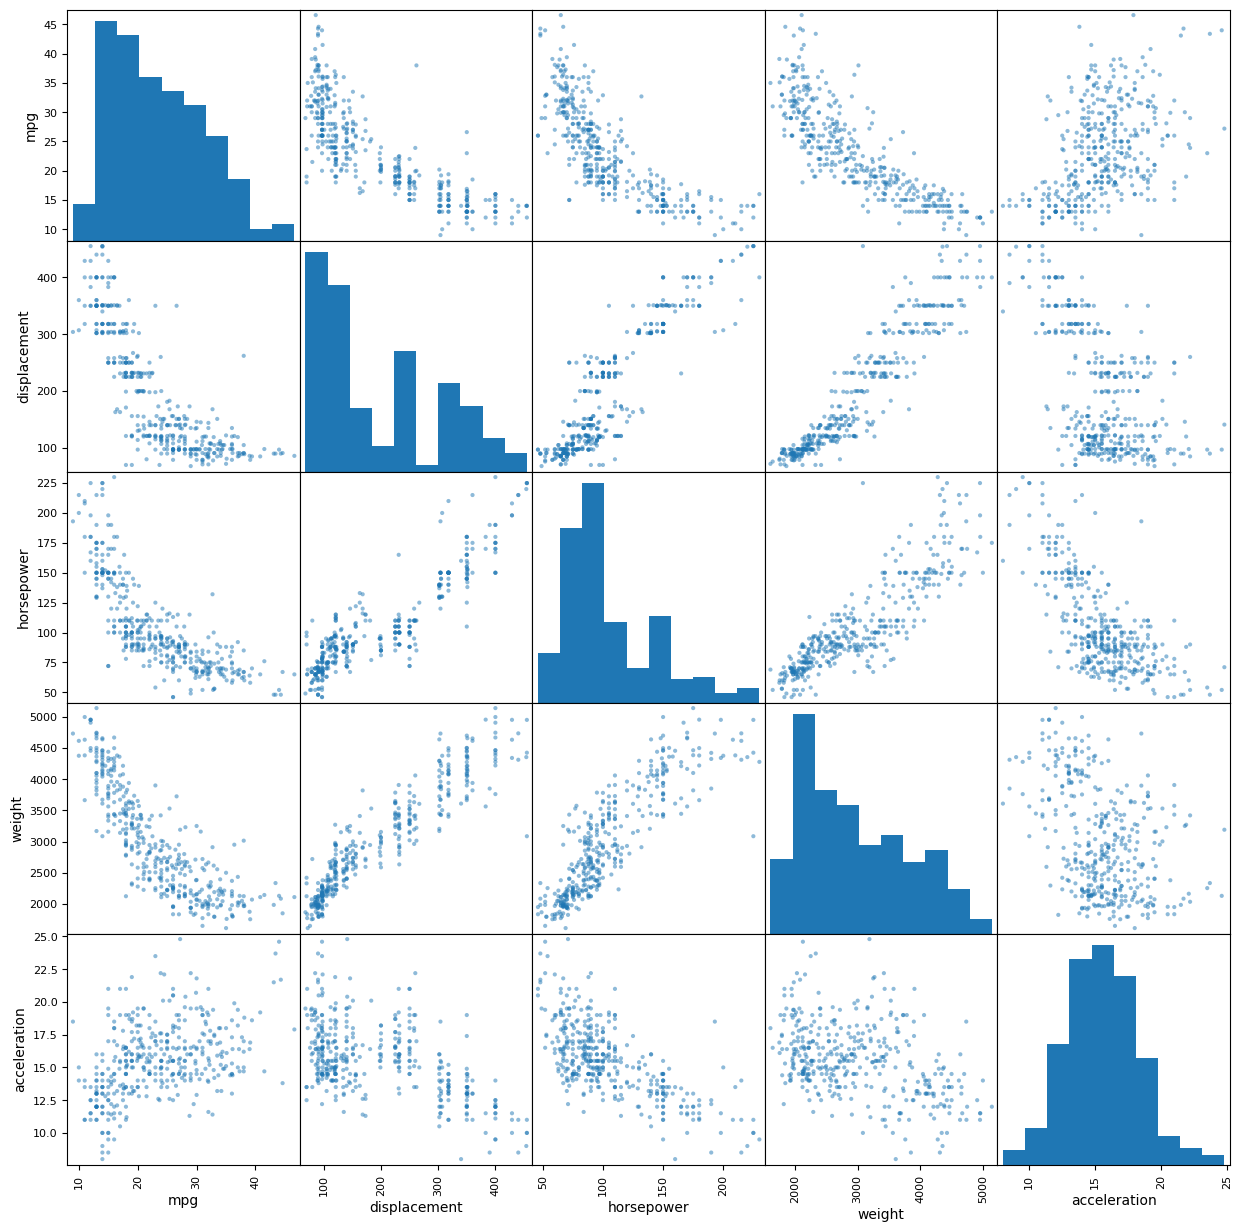

In [184]:
# Applied 9
Auto = pd.read_csv("../Resources/Auto.csv", na_values=["?"])
Auto.dropna(inplace=True)



#pd.plotting.scatter_matrix( Auto, figsize  = [15, 15] );
pd.plotting.scatter_matrix( Auto[["mpg", "displacement","horsepower","weight","acceleration"]], figsize  = [15, 15] );




In [186]:
Auto[["mpg", "displacement","horsepower","weight","acceleration"]].corr()

,mpg,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000


In [ ]:


X = pd.DataFrame({
    'intercept': np.ones(xy.shape[0]),
    'horsepower': Auto['horsepower'],
    'displacement': Auto['displacement'],
    'weight': Auto['weight'],
    'acceleration': Auto['acceleration'],
    'cylinders': Auto['cylinders'],
    'year': Auto['year'],
    'origin': Auto['origin'],
    })
y = xy["mpg"].astype(float)
y[:4]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)
#Auto.columns



In [249]:
li_x = ["displacement","horsepower","weight","acceleration", "cylinders", "year", "origin"]
li_results = []

y = Auto["mpg"].astype(float)

for x in li_x:

    X = pd.DataFrame({
        'intercept': np.ones(Auto.shape[0]),
        x: Auto[x],
        })

    model = sm.OLS(y, X)
    li_results.append(model.fit())
#summarize(results)

anova_lm(*li_results)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,390.0,8378.821617,0.0,NaN,NaN,NaN
1,390.0,9385.915872,-0.0,-1007.094255,inf,NaN
2,390.0,7321.233706,-0.0,2064.682166,-inf,NaN
3,390.0,19550.461912,-0.0,-12229.228206,inf,NaN
4,390.0,9415.910391,-0.0,10134.551521,-inf,NaN
5,390.0,15791.330185,-0.0,-6375.419794,inf,NaN
6,390.0,16209.755458,-0.0,-418.425272,inf,NaN
